# Homework 2

## FINM 25000 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

Answer:

The two types of investments referenced by "Alternative ETFs" are (1) alternative asset classes that are not "mainstream" such real estate, commodities previous metal, currencies and volatility, and (2) alternative strategies that are unconventional investment processes such as geared investing, L/S strats, market neutral, absolute return, convertable/merger arb., managed futures, global macro.

## 2. Hedge Funds.


* a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

1. Attractive returns. From 1994 to 2013, hedge funds had 10% higher retursn than stock and more than twice as much as bonds. Additionally, hedge funds provided a "smoother ride" (i.e. a lower vol.).
2. Attractive risk-return characteristics in terms of sharpe ratio. Hedge funds has less than half the vol. of the S&P 500 and had annualized returns less than 1% lower than those respective companies. As a result, hedge fund allocation could provide a dominant efficient frontier and diversification benefits.

* b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

There are many benefits for investing in hedge fund ETFs compared to direct investment.
- Democratization: more access for retail investors to hedge fund beta, rules-based investments strategy, lower fees (more money in the hands of investors)
- - Accessibility
- - Transparency
- - Lower fees
- - Liquidity
- - Diversification
- - Regulatory oversight
- - Tax reporting

## 3. The Benchmarks

* a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

- - HFRI: a index available for hedge fund investors that was designed to reflect the collective performance of hedge funds through an equally weighted composite of over 2,000 constituent hedge funds that were available to accredited investors
- - MLFM: a statistical multi-factor model designed to track the performance of hedge funds (Factors: S&P 500, Russell 2000, MSCI EAFE, MSCI Emerging Markets, Eurodollar/US dollar exchange rate, three-month Eurodollar Deposit yields)
- - MLFM-ES: an adapted version MLFM but the six index components were tradable, the three-month Eurodollar deposit yields were replaced with US Treasury Bills and the dollar/euro exchange rates were replaced with ProShares UltraShort Euro (EUO)
- - HDG: Hedge Fund Replication ETF, a ProShare's liquid alternative strategy product that provided exposure to hedge funds at low fees, with full transparency and providing daily liquidity

* b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

- - The MLFM had a correlation coefficient of 90% with HFRI

* c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

- - The factor with the largest loading was the 3-month T-Bills

* d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

- - The factors were limited and didn't fully envelope potential sources of returns in HFRI
- - The regression used to determine the weights was backward-looking and lagged behind changes in hedge fund styles
- - Whether the model captures hedge fund alpha or beta. The purpose of investing is to earn "alpha" but if MLFM only captured beta to the factor than it might not replicate the skill of the hedge fund managers


## 4. The HDG Product

* a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

- - HDG attempts to track the performance of MLFM --> MLFM-ES with a very high correlation (99.7%).

* b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

- - Yes, the point of hedge funds is to generate alpha. However, HDG is valuable since it provides the benefits of hedge funds ETFs as mentioned earlier including: accessibility, transperancy, lower fees, liquidity, etc.

* c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?


In [1]:
sharpe_ratio = ((1 - 0.02) * (1 - 0.2) * (1 - 0.01) * 0.1) / 0.2

print(f" The sharpe ratio would be: {sharpe_ratio:.2f}")

 The sharpe ratio would be: 0.39


***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>.

It has monthly data on financial indexes and ETFs from `Aug 2011` through `May 2025`.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1.

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [3]:
from google.colab import drive
drive.mount('/content/drive')
hedge_fund_series_df = pd.read_excel('/content/drive/My Drive/proshares_analysis_data.xlsx', sheet_name='hedge_fund_series', index_col=0,parse_dates=[0])

Mounted at /content/drive


In [4]:
# From hw1
def calc_return_metrics(rets, adj_factor=12):
    """
    Calculate return metrics for a given dataset. Specifically:
    - Annualized Return
    - Annualized Volatility
    - Annualized Sharpe Ratio

    Args:
        rets : Returns time series.
        adj (int, optional): Annualization. Defaults to 12.

    Returns:
        DataFrame or dict: Summary of return metrics.
    """
    summary = {}
    summary['Annualized Mean'] = rets.mean() * adj_factor
    summary['Annualized Volatility'] = rets.std() * np.sqrt(adj_factor)
    summary['Annualized Sharpe Ratio'] = (
        summary['Annualized Mean'] / summary['Annualized Volatility']
        )
    return pd.DataFrame(summary, index=rets.columns)

In [5]:
hedge_fund_series_df.head()

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027035,-0.006491
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142
2011-10-31,0.026858,0.043593,0.043320,0.050532,0.025241
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001854


In [6]:
metrics = calc_return_metrics(hedge_fund_series_df).sort_values('Annualized Sharpe Ratio', ascending=False)
display(metrics)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
HFRIFWI Index,0.041447,0.060416,0.686023
MLEIFCTR Index,0.030670,0.057147,0.536686
MLEIFCTX Index,0.029239,0.056985,0.513102
QAI US Equity,0.016958,0.049895,0.339873
HDG US Equity,0.019442,0.059589,0.326268


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [7]:
def calc_risk_metrics(data, as_df=False, adj_factor=12):
  """
  Calculates risk metrics for a given dataset. Returns df with:
  Skewness
  Excess Kurtosis (in excess of 3)
  VaR (.05)
  CVaR (.05)
  Maximum drawdown

  Args:
  data : Returns time series.
  as_df (bool, optional): Return a df or a dictionary. Defaults to False.
  adj (int, optional): Annualization. Defaults to 12.

  Returns:
  Dataframe with above metrics.
  """
  summary = {} #Empty dict

  #Skewness
  summary['Skewness'] = data.skew()

  #Excess kurtosis
  summary['Kurtosis'] = data.kurtosis()

  #VaR (.05)
  summary['VaR (.05)'] = data.quantile(0.05, axis=0)

  #cVaR (.05)
  summary['cVar (.05)'] = data[data <= data.quantile(0.05, axis=0)].mean()

  #Max drawdown
  summary['Min'] = data.min()
  summary['Max'] = data.max()

  drawdown = (data - data.max()) / data.max()
  summary['Max Drawdown'] = drawdown.min()

  wealth_index = 1000 * (1 + data).cumprod()
  previous_peaks = wealth_index.cumprod()
  summary['Peak'] = previous_peaks.idxmax() # the date when he highest peak occurred
  summary['Bottom'] = drawdown.idxmin()
  summary_df = pd.DataFrame(summary)
  recovery_date = []
  for col in data.columns:
    peak_date = summary_df.loc[col, 'Peak']
    trough_date = summary_df.loc[col, 'Bottom']

    peak_value = wealth_index[col].loc[peak_date]
    post_trough = wealth_index[col].loc[trough_date:]

    recovery = post_trough[post_trough >= peak_value]
    recovery_date.append(recovery.index.min() if not recovery.empty else pd.NaT)

  summary['Recovery'] = recovery_date

  return pd.DataFrame(summary)

In [8]:
risk_metrics = calc_risk_metrics(hedge_fund_series_df)
display(risk_metrics)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


,Skewness,Kurtosis,VaR (.05),cVar (.05),Min,Max,Max Drawdown,Peak,Bottom,Recovery
HFRIFWI Index,-0.979063,5.955123,-0.025324,-0.037478,-0.090784,0.058602,-2.549157,2019-12-31,2020-03-31,2020-08-31
MLEIFCTR Index,-0.244981,1.689648,-0.028764,-0.035857,-0.053234,0.058886,-1.904024,2020-01-31,2020-03-31,2020-08-31
MLEIFCTX Index,-0.231032,1.657903,-0.029119,-0.035816,-0.052384,0.058805,-1.890812,2020-01-31,2020-03-31,2020-08-31
HDG US Equity,-0.233880,1.799098,-0.031209,-0.037577,-0.059191,0.058304,-2.015207,2020-01-31,2020-03-31,2020-11-30
QAI US Equity,-0.461338,1.825993,-0.020593,-0.032695,-0.056346,0.039785,-2.416284,2020-01-31,2020-03-31,2020-07-31


## 3.

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [9]:
merrill_factors_df = pd.read_excel('/content/drive/My Drive/proshares_analysis_data.xlsx', sheet_name='merrill_factors', index_col=0,parse_dates=[0])

In [10]:
merrill_factors_df.head()

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913
2011-09-30,-0.069449,0.000017,-0.179064,-0.108083,0.142180,-0.111541
2011-10-31,0.109147,-0.000013,0.162986,0.096275,-0.069502,0.151012
2011-11-30,-0.004064,0.000000,-0.019723,-0.021764,0.054627,-0.003783
2011-12-31,0.010440,0.000009,-0.043017,-0.022139,0.075581,0.005114


In [11]:
def reg_metrics(funds,compare,adj=12):
  """
  funds is df with hedge funds we wish to compare with compare
  """

  results = []
  spy_returns = compare
  X = sm.add_constant(spy_returns)

  for fund in funds.columns:
    y = funds[fund]
    model = sm.OLS(y, X).fit()

    alpha = model.params['const']
    beta = model.params['SPY US Equity']

    resid_std_monthly = model.resid.std()
    resid_std_annual = resid_std_monthly * np.sqrt(adj)
    i_ratio = (alpha * adj) / resid_std_annual
    t_ratio = (y.mean() / beta) * adj

    results.append({
        'Fund': fund,
        'Beta': beta,
        'Treynor Ratio': t_ratio,
        'Information Ratio': i_ratio
    })
  results_df = pd.DataFrame(results)
  return results_df
reg_metrics(hedge_fund_series_df,merrill_factors_df['SPY US Equity'])

,Fund,Beta,Treynor Ratio,Information Ratio
0,HFRIFWI Index,0.348217,0.119027,-0.109520
1,MLEIFCTR Index,0.349859,0.087664,-0.571877
2,MLEIFCTX Index,0.348514,0.083896,-0.620547
3,HDG US Equity,0.359536,0.054075,-0.964387
4,QAI US Equity,0.294096,0.057662,-0.832728


## 4.

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

**Response:**

For all four funds, beta tells us that they are less volatile than SPY. TR tells us that the return per unit of market risk is low — so they may be taking on more market risk than the return justifies. Lastly, the IR indicates poor skill.

Between HDG and QAI, QAI performs better because it is less volatile, has a higher return per unit of market risk, and has a higher IR (slightly more skill).



## 5.

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
HFRIFWI Index,1.000000,0.895735,0.895074,0.884691,0.844995,0.843011,-0.061152,0.765343,0.833211,-0.367345,0.870472
MLEIFCTR Index,0.895735,1.000000,0.999925,0.987307,0.890382,0.895446,0.007714,0.818981,0.910472,-0.407624,0.902515
MLEIFCTX Index,0.895074,0.999925,1.000000,0.987084,0.890018,0.894545,0.006336,0.820142,0.911048,-0.409716,0.901200
HDG US Equity,0.884691,0.987307,0.987084,1.000000,0.876684,0.882501,0.009440,0.802175,0.896520,-0.402240,0.892387
QAI US Equity,0.844995,0.890382,0.890018,0.876684,1.000000,0.862120,0.020488,0.791588,0.865691,-0.464707,0.793059
SPY US Equity,0.843011,0.895446,0.894545,0.882501,0.862120,1.000000,-0.039320,0.703297,0.862924,-0.358633,0.878929
USGG3M Index,-0.061152,0.007714,0.006336,0.009440,0.020488,-0.039320,1.000000,-0.009906,0.018678,-0.017211,-0.074925
EEM US Equity,0.765343,0.818981,0.820142,0.802175,0.791588,0.703297,-0.009906,1.000000,0.838243,-0.596092,0.659133
EFA US Equity,0.833211,0.910472,0.911048,0.896520,0.865691,0.862924,0.018678,0.838243,1.000000,-0.558446,0.778754
EUO US Equity,-0.367345,-0.407624,-0.409716,-0.402240,-0.464707,-0.358633,-0.017211,-0.596092,-0.558446,1.000000,-0.275158


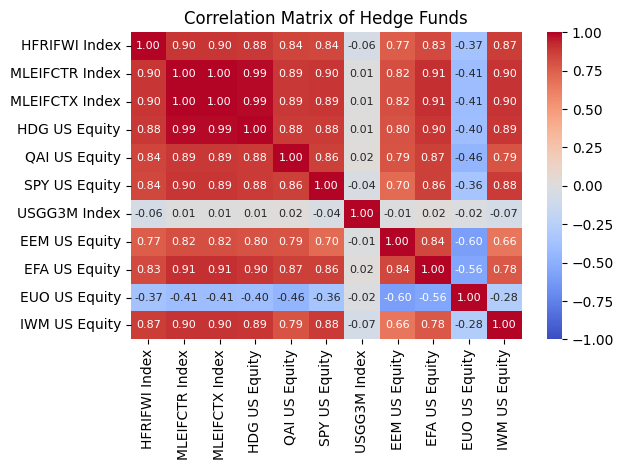

In [12]:
merged = pd.merge(hedge_fund_series_df, merrill_factors_df, left_index=True, right_index=True)
corr_matrix = merged.corr()
display(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Hedge Funds')
plt.tight_layout()
plt.show()

The series with the highest correlation is MLEIFCTR Index with MLEIFCTX Index, and the lowest is between EEM US Equity and EUO US Equity.

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.

b. Are the betas realistic position sizes, or do they require huge long-short positions?

c. Report the R-squared.

d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [13]:
def multi_reg(funds,compare,adj=12):
  results = dict()
  X = sm.add_constant(funds)
  y = compare
  model = sm.OLS(y, X).fit()
  alpha = model.params['const']

  for fund in funds.columns:
    results[f'Beta_{fund}'] = model.params[fund]
  r_squared = model.rsquared
  tracking_error = model.resid.std()

  results['Alpha'] = alpha
  results['R-squared'] = r_squared
  results['Tracking Error'] = tracking_error

  results_df = pd.DataFrame([results])
  return results_df

multi_reg(merrill_factors_df, hedge_fund_series_df['HFRIFWI Index'])

,Beta_SPY US Equity,Beta_USGG3M Index,Beta_EEM US Equity,Beta_EFA US Equity,Beta_EUO US Equity,Beta_IWM US Equity,Alpha,R-squared,Tracking Error
0,0.029963,-0.370915,0.079118,0.084161,0.023106,0.153294,0.001483,0.836058,0.007062


## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation.
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [36]:
"""
def oos_replication(hfri, factors, window=60):

  # Loop through the time series starting at t = 60
  predictions = []
  for t in range(window, len(hfri)):
    #Get past data
    past_returns = hfri[t - window:t]
    past_factors = factors.iloc[t-window:t]

    #Fit the regression
    X = sm.add_constant(past_factors)
    y = past_returns
    model = sm.OLS(y, X).fit()

    #Get current (time t) factor values (fixed to adjust num of cols)
    current_factors = factors.iloc[t]
    current_factors_df = pd.DataFrame([current_factors])
    current_factors_df = sm.add_constant(current_factors_df)
    #current_factors_df = current_factors_df[X.columns]
    #Predict return at time t using model
    predicted_return = model.predict(current_factors).iloc[0]
    predictions.append(predicted_return)

  #Align prediction index with actual returns
  predicted_series = pd.Series(predictions, index=hfri.index[window:])
  actual_series = hfri[window:]
  return predicted_series, actual_series
oos_replication(hedge_fund_series_df['HFRIFWI Index'], merrill_factors_df)
"""

"\ndef oos_replication(hfri, factors, window=60): \n\n  # Loop through the time series starting at t = 60\n  predictions = [] \n  for t in range(window, len(hfri)): \n    #Get past data \n    past_returns = hfri[t - window:t]\n    past_factors = factors.iloc[t-window:t]\n\n    #Fit the regression\n    X = sm.add_constant(past_factors)\n    y = past_returns \n    model = sm.OLS(y, X).fit()  \n\n    #Get current (time t) factor values (fixed to adjust num of cols)\n    current_factors = factors.iloc[t]\n    current_factors_df = pd.DataFrame([current_factors])\n    current_factors_df = sm.add_constant(current_factors_df)\n    #current_factors_df = current_factors_df[X.columns]\n    #Predict return at time t using model\n    predicted_return = model.predict(current_factors).iloc[0]\n    predictions.append(predicted_return)\n  \n  #Align prediction index with actual returns\n  predicted_series = pd.Series(predictions, index=hfri.index[window:])\n  actual_series = hfri[window:]\n  return pre

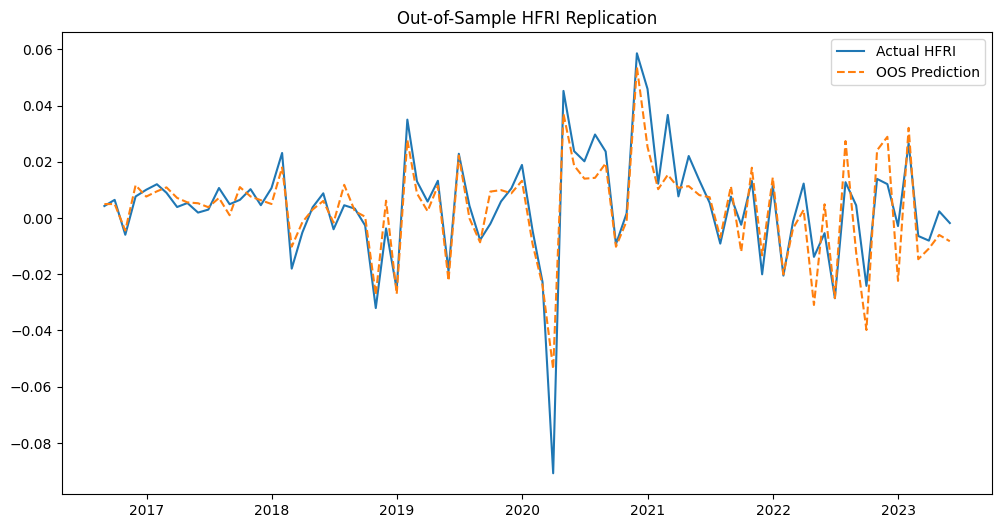

In [35]:
def oos_replication(hfri, factors, window=60):
  """
  Uses a rolling amount of data to estimate a regression equation.

  Args:
  HFRI- Index that is replicated by factors
  Factors- List of factors used to replicate HFRI
  Window- number of months used for estimation

  Returns:
  Predicted series and actual series for the HFRI in given window
  """
  predictions = []
  # Loop through the time series starting at t = 60
  for t in range(window, len(hfri)):
      #Get past data
      past_returns = hfri[t - window:t]
      past_factors = factors.iloc[t - window:t]

      #Fit the regression
      X = sm.add_constant(past_factors, has_constant='add')
      model = sm.OLS(past_returns, X).fit()

      #Get current (time t) factor values (fixed to adjust num of cols)
      current_factors = factors.iloc[t]
      current_factors_df = pd.DataFrame([current_factors])
      if 'const' not in current_factors_df.columns:
        current_factors_df.insert(0, 'const', 1.0)

      #Predict return at time t using model
      current_factors_df = current_factors_df.reindex(columns=X.columns, fill_value=1.0)
      predicted_return = model.predict(current_factors_df).iloc[0]
      predictions.append(predicted_return)

  #Align prediction index with actual returns
  predicted_series = pd.Series(predictions, index=hfri.index[window:])
  actual_series = hfri[window:]
  return predicted_series, actual_series

predicted, actual = oos_replication(hedge_fund_series_df['HFRIFWI Index'], merrill_factors_df)
plt.figure(figsize=(12,6))
plt.plot(actual.index, actual, label='Actual HFRI')
plt.plot(predicted.index, predicted, label='OOS Prediction', linestyle='--')
plt.legend()
plt.title('Out-of-Sample HFRI Replication')
plt.show()

***

# 3.  Extensions
<i>**This section is not graded, and you do not need to submit it.** Still, we may discuss it in class some extensions in class.

For those looking for a challenge, try a few of these.

## 1.

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`.
* Try using GLM in statsmodels.

## 2.

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3.

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3.

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

## 5.

In `Section 2`, we estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

***